<a href="https://colab.research.google.com/github/gferew1/IntroML/blob/main/homework4part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
K=1: Accuracy=0.92, Precision=0.88, Recall=0.89
K=2: Accuracy=0.96, Precision=0.88, Recall=0.94
K=3: Accuracy=0.96, Precision=0.88, Recall=0.91
K=4: Accuracy=0.97, Precision=0.94, Recall=0.94
K=5: Accuracy=0.97, Precision=0.96, Recall=0.94
K=6: Accuracy=0.97, Precision=0.96, Recall=0.94
K=7: Accuracy=0.97, Precision=0.96, Recall=0.94
K=8: Accuracy=0.97, Precision=0.93, Recall=0.91
K=9: Accuracy=0.98, Precision=0.94, Recall=0.94
K=10: Accuracy=0.98, Precision=0.94, Recall=0.94
K=11: Accuracy=0.98, Precision=0.94, Recall=0.94
K=12: Accuracy=0.98, Precision=0.96, Recall=0.94
K=13: Accuracy=0.98, Precision=0.96, Recall=0.96
K=14: Accuracy=0.98, Precision=0.96, Recall=0.96
K=15: Accuracy=0.98, Precision=0.96, Recall=0.96
K=16: Accuracy=0.98, Precision=0.96, Recall=0.96
K=17: Accuracy=0.98, Precision=0.96, Recall=0.96
K=18: Accuracy=0.98, Precision=0.96, Recall=0.9

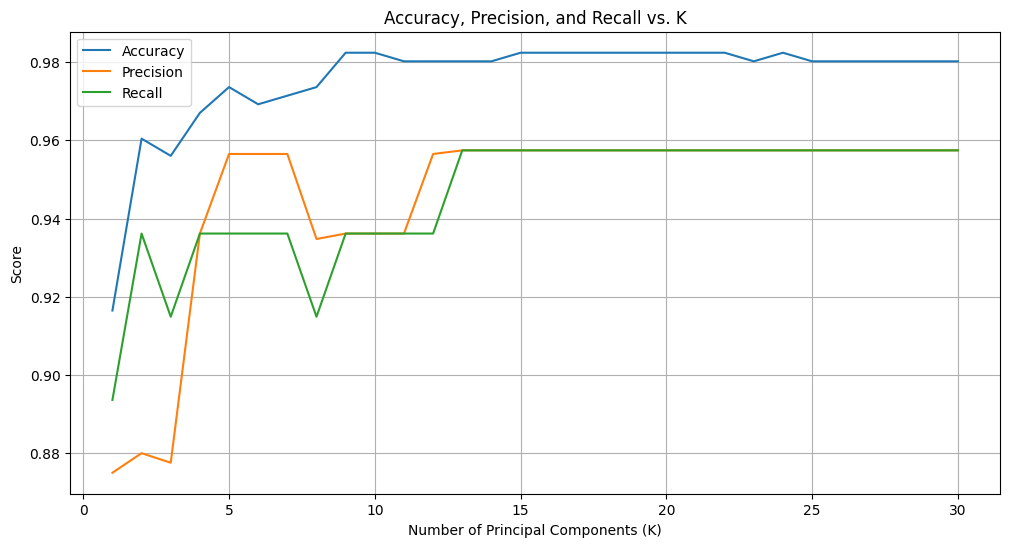

linear kernel: Mean Accuracy = 0.97
poly kernel: Mean Accuracy = 0.89
rbf kernel: Mean Accuracy = 0.98


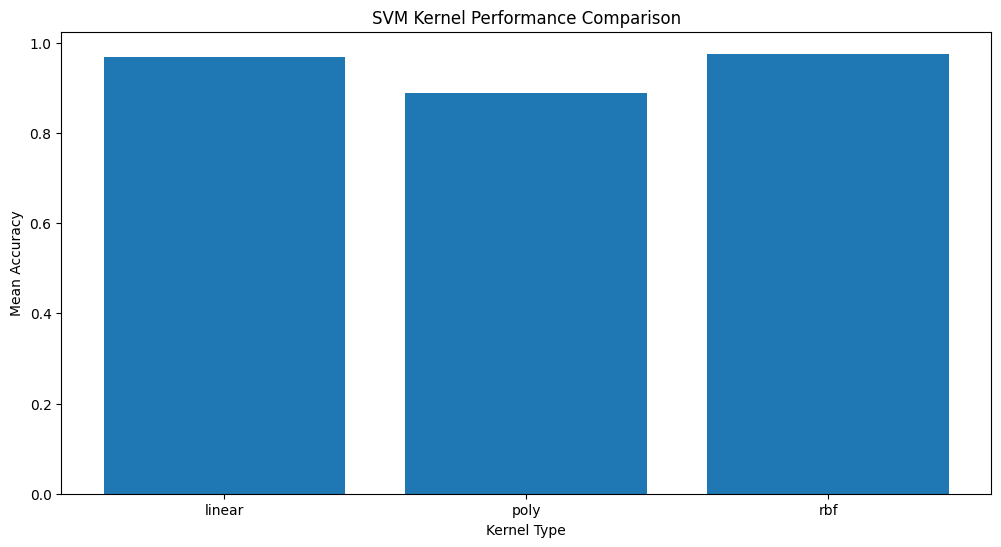

The best kernel is rbf with a mean accuracy of 0.98


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load your dataset
file_path = '/content/drive/My Drive/Colab Notebooks/cancer.csv'
ds1 = pd.read_csv(file_path)

# Map the target variable 'diagnosis' to binary values
ds1['diagnosis'] = ds1['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target variable
X = ds1.iloc[:, 2:32].values
y = ds1.iloc[:, 1].values

x = housing.iloc[:, 1:11].values
Y = housing.iloc[:, 0].values
m = len(Y)  # Number of training examples
n = len(X)  # Number of training examples
housing.head()
print(X.shape)



# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Store results in dictionaries
results = {
    "accuracy": [],
    "precision": [],
    "recall": []
}

best_k = None
best_accuracy = 0

# Determine the optimum number of principal components (K)
for k in range(1, 31):  # Iterate from 1 to 30
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)


    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train_pca, Y_train)


    accuracies = cross_val_score(estimator=classifier, X=X_train_pca, y=Y_train, cv=5)
    mean_accuracy = accuracies.mean()


    Y_pred = classifier.predict(X_test_pca)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)

    results["accuracy"].append(mean_accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)


    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_k = k


for k, accuracy, precision, recall in zip(range(1, 31), results["accuracy"], results["precision"], results["recall"]):
    print(f"K={k}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}")

print(f"The best K is {best_k} with a mean accuracy of {best_accuracy:.2f}")


ks = range(1, 31)
plt.figure(figsize=(12, 6))
plt.plot(ks, results["accuracy"], label='Accuracy')
plt.plot(ks, results["precision"], label='Precision')
plt.plot(ks, results["recall"], label='Recall')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Accuracy, Precision, and Recall vs. K')
plt.legend()
plt.grid(True)
plt.show()





from sklearn.svm import SVC


kernel_results = {}


kernels = ['linear', 'poly', 'rbf']


best_kernel = None
best_accuracy = 0


for kernel in kernels:
    classifier = SVC(kernel=kernel, random_state=0)
    classifier.fit(X_train, Y_train)


    accuracies = cross_val_score(estimator=classifier, X=X_train, y=Y_train, cv=5)
    mean_accuracy = accuracies.mean()

    kernel_results[kernel] = mean_accuracy


    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_kernel = kernel

# Print results for each kernel
for kernel, accuracy in kernel_results.items():
    print(f"{kernel} kernel: Mean Accuracy = {accuracy:.2f}")

# Plot the results for each kernel
plt.figure(figsize=(12, 6))
plt.bar(kernel_results.keys(), kernel_results.values())
plt.xlabel('Kernel Type')
plt.ylabel('Mean Accuracy')
plt.title('SVM Kernel Performance Comparison')
plt.show()

# Print the best kernel
print(f"The best kernel is {best_kernel} with a mean accuracy of {best_accuracy:.2f}")

